In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set the custom palette
custom_palette = sns.color_palette(['purple','mediumpurple'])
sns.set_palette(custom_palette)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt') 

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yimingzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yimingzhao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
df['v2'].duplicated().sum()

403

In [9]:
# drop dulicates
df['v2'].drop_duplicates(keep='first',inplace=True)

In [10]:
# change the v1 column to binary, assign ham as 0 and spam as 1
df['v1'] = df['v1'].apply(lambda x: 1 if x=='spam' else 0)

In [11]:
# rename column names
df.rename(columns={'v1':'is_spam', 'v2':'message'}, inplace=True)

In [12]:
df.head()

,is_spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [13]:
counts_v1 = df['is_spam'].value_counts()
counts_v1

0    4825
1     747
Name: is_spam, dtype: int64

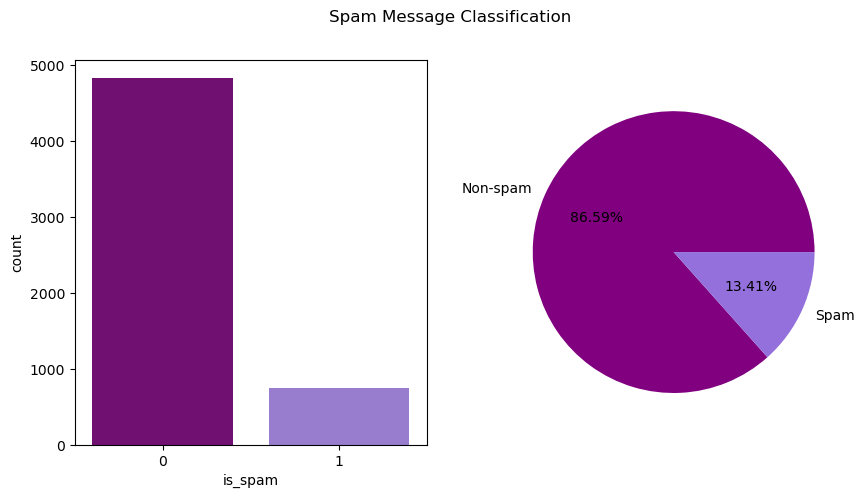

In [14]:
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='is_spam', data=df)

plt.subplot(1,2,2)
plt.pie(counts_v1, labels=['Non-spam','Spam'], autopct='%.2f%%')

plt.suptitle('Spam Message Classification')
plt.show()

## Structural Analysis

In [16]:
# get character, word,  and sentence counts
df['num_character'] = df['message'].apply(len)
df['num_word'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,is_spam,message,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
structure_list = ['num_character','num_word', 'num_sentence']

In [39]:
df.groupby('is_spam')[structure_list].describe().T

is_spam                        0           1
num_character count  4825.000000  747.000000
              mean     71.023627  138.866131
              std      58.016023   29.183082
              min       2.000000   13.000000
              25%      33.000000  132.500000
              50%      52.000000  149.000000
              75%      92.000000  157.000000
              max     910.000000  224.000000
num_word      count  4825.000000  747.000000
              mean     17.271917   27.891566
              std      13.988885    6.867007
              min       1.000000    2.000000
              25%       8.000000   25.000000
              50%      13.000000   29.000000
              75%      22.000000   32.000000
              max     220.000000   46.000000
num_sentence  count  4825.000000  747.000000
              mean      1.808705    3.017403
              std       1.328227    1.528449
              min       1.000000    1.000000
              25%       1.000000    2.000000
              50%       1.000000    3.000000
              75%       2.000000    4.000000
              max      28.000000    8.000000

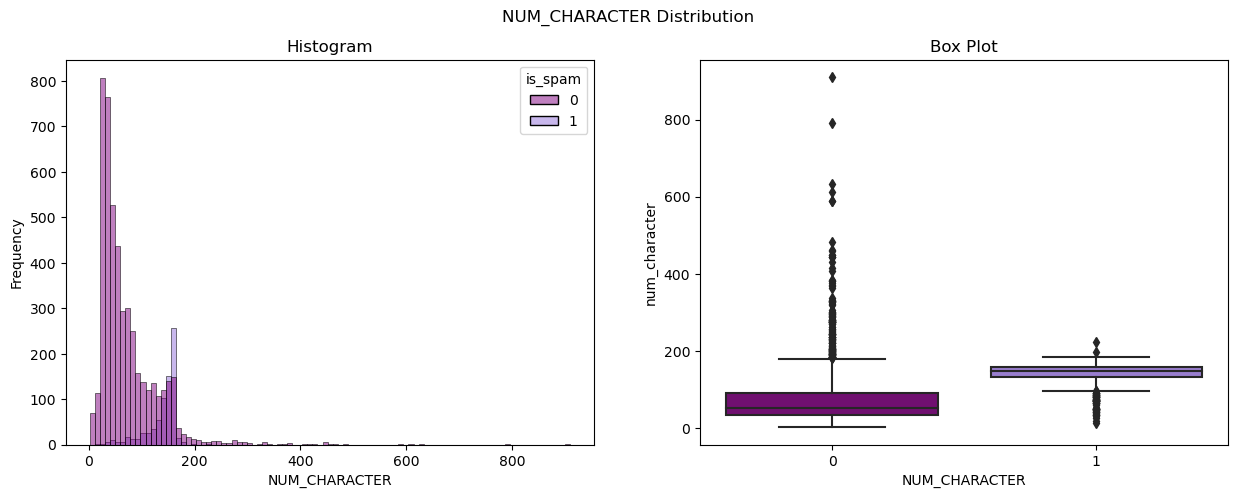

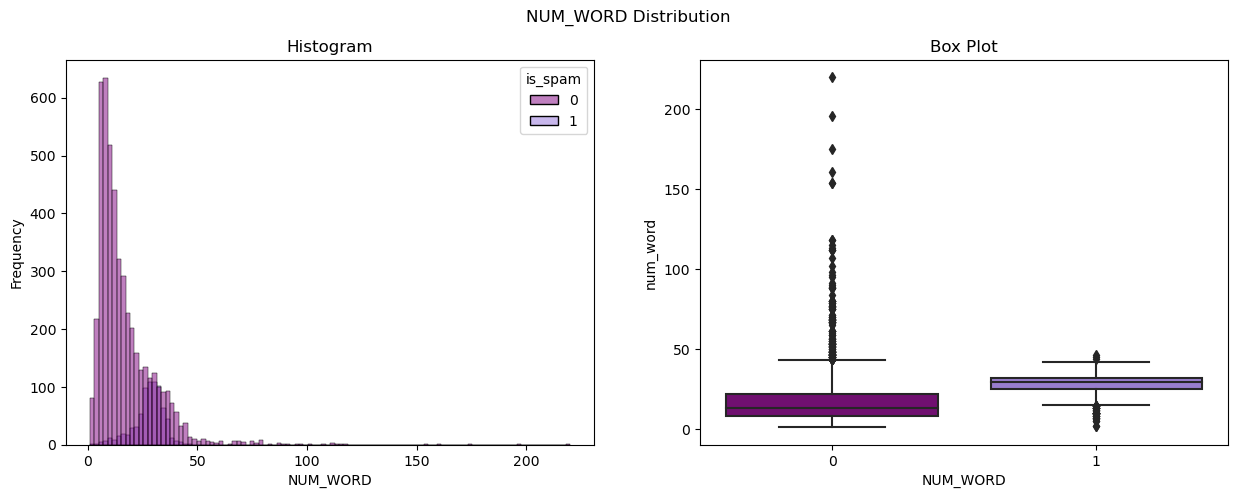

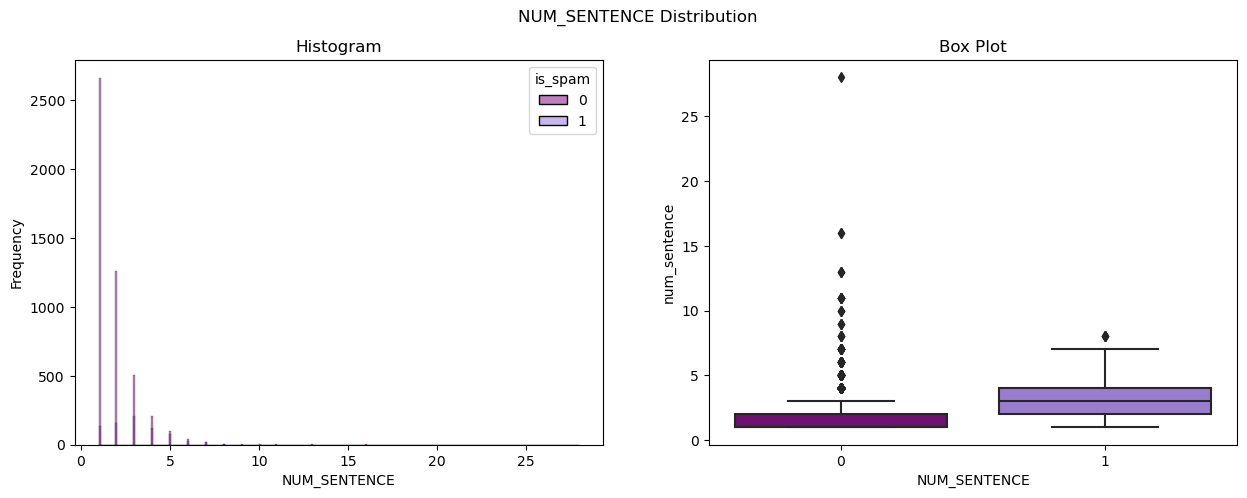

In [33]:
for col in structure_list:
    
    plt.subplots(1,2,figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.histplot(x=col, data=df, hue='is_spam')
    plt.title('Histogram')
    plt.xlabel(f'{col.upper()}')
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='is_spam', y=col, data=df)
    plt.title(f'Box Plot')
    plt.xlabel(f'{col.upper()}')

    plt.suptitle(f'{col.upper()} Distribution')
    
    plt.show()

Spam messages tend to contain more characters, words than non-spam messages. The majority of the non-spam messages contain at most 2 sentences, while spam ones consists of more than 2 sentences, except for some outliers. 

<Figure size 2000x2000 with 0 Axes>

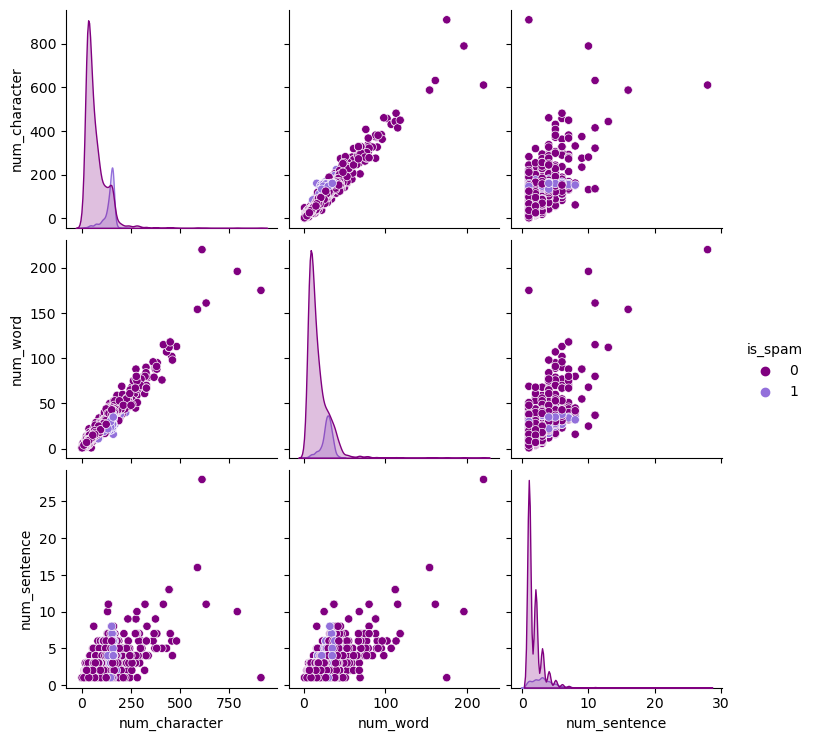

In [43]:
# create pairplot for the data frame
plt.figure(figsize=(20,20))

sns.pairplot(df, hue='is_spam')

plt.show()

Three common features that can be extracted from text data for such analysis are the number of characters, the number of words, and the number of sentences. These features can be indicators of the message's complexity, verbosity, and structure.

Typically, we might expect that as the number of sentences in a message increase, the number of words and characters should increase too. Upon examination of the pairplot, there is no clear linear relationship between these three variables for spam messages. This can be seen in the vertically distributed `num_character` and `num_word` when the sentence length increases. This lack of clear linear relationship in spam messages might indicate that some spam messages use many short sentences.

# Export

In [44]:
df.to_csv('spam_cleaned.csv',index=False)